In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,LinearRegression,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as mt

In [2]:
data = pd.read_csv('../../data/IceCreamData.csv')

In [5]:
X = np.array(data['Temperature']).reshape(-1,1)
y = np.array(data['Revenue']).reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [24]:
models = {'model': [LinearRegression(), Ridge(), Lasso(), ElasticNet(), PolynomialFeatures(), SVR(kernel='rbf'), DecisionTreeRegressor(), BaggingRegressor(), RandomForestRegressor()],
          'name': ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'PolynomialRegression', 'SVR', 'DecisionTreeRegression', 'BaggingRegression', 'RandomForestRegression']}



df = pd.DataFrame({'model':[],'R2':[],'MSE':[]})

In [25]:
def train_and_evaluate_model(model):
    predict = model.fit(X_train, y_train).predict(X_test)
    r2 = mt.r2_score(y_test, predict)
    mse = mt.mean_squared_error(y_test, predict)
    return r2, mse

In [26]:
for model, name in zip(models['model'], models['name']):
     if name == 'PolynomialRegression':
         poly = PolynomialFeatures(degree=2)
         X_train_poly = poly.fit_transform(X_train)
         X_test_poly = poly.transform(X_test)
         model = LinearRegression()
         


     r2,mse = train_and_evaluate_model(model)
     print(f'R2: {r2} MSE: {mse}')
     df = df._append({'model': name, 'R2': r2, 'MSE': mse}, ignore_index=True)
    

R2: 0.9771532792713993 MSE: 652.5200612979733
R2: 0.9771521723077147 MSE: 652.5516770392402
R2: 0.9771321302668287 MSE: 653.1240932692453
R2: 0.9768661775155415 MSE: 660.7199100883741
R2: 0.9771532792713993 MSE: 652.5200612979733
R2: 0.5220772084444609 MSE: 13649.84554878037
R2: 0.9534772958686918 MSE: 1328.7245076491977
R2: 0.9653091029159687 MSE: 990.798922990124
R2: 0.9648298861732046 MSE: 1004.4857247888608


C:\Users\firat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\firat\AppData\Local\Temp\ipykernel_32712\1644671652.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  predict = model.fit(X_train, y_train).predict(X_test)


In [27]:
df

,model,R2,MSE
0,LinearRegression,0.977153,652.520061
1,Ridge,0.977152,652.551677
2,Lasso,0.977132,653.124093
3,ElasticNet,0.976866,660.719910
4,PolynomialRegression,0.977153,652.520061
5,SVR,0.522077,13649.845549
6,DecisionTreeRegression,0.953477,1328.724508
7,BaggingRegression,0.965309,990.798923
8,RandomForestRegression,0.964830,1004.485725


C:\Users\firat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


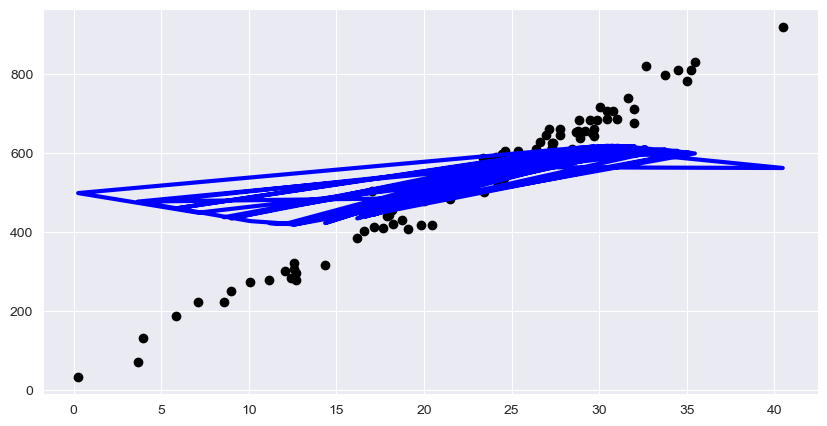

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, SVR().fit(X_train,y_train).predict(X_test), color='blue', linewidth=3)
 
